# DB 종료 후 DF 작업하기
(여기서부터 시작)

In [45]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pymysql
# from sqlalchemy import create_engine
# !pip install scikit-learn
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import skew, kurtosis
import os

In [46]:
# matplotlib 한글 사용

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

### 데이터 불러와서 가공하기

In [47]:
fd_df = pd.read_csv('./data/fine_dust.csv')
wt_df = pd.read_csv('./data/weather_data.csv')
fd_df.columns, wt_df.columns

(Index(['Unnamed: 0', 'station_id', 'station_name', 'date', 'fine_dust(㎍/㎥)'], dtype='object'),
 Index(['Unnamed: 0', 'station_id', 'station_name', 'date_time', 'avg_temp',
        'min_temp', 'max_temp', 'daily_precipitation', 'avg_wind_speed',
        'daily_snow_depth'],
       dtype='object'))

In [48]:
# 필요 컬럼만 자르기
fd_df = fd_df.loc[:, ['date', 'fine_dust(㎍/㎥)']] 
fd_df.columns=['Date', 'Fine_dust(㎍/㎥)']
wt_df = wt_df.loc[:, ['date_time', 'daily_precipitation', 'daily_snow_depth']]
wt_df.columns=['Date', 'Precipitation(mm)', 'Snow_depth(cm)']
fd_df.info(), wt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1323 entries, 0 to 1322
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            1323 non-null   object
 1   Fine_dust(㎍/㎥)  1323 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 20.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1399 entries, 0 to 1398
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               1399 non-null   object 
 1   Precipitation(mm)  591 non-null    float64
 2   Snow_depth(cm)     92 non-null     float64
dtypes: float64(2), object(1)
memory usage: 32.9+ KB


(None, None)

In [49]:
# 미세먼지에서 아래 날짜 누락됨 (날짜 자체가 없음)
# Timestamp('2021-01-23 00:00:00'),
#  Timestamp('2021-03-01 00:00:00'),
#  Timestamp('2021-03-28 00:00:00'),
#  Timestamp('2021-04-04 00:00:00'),
#  Timestamp('2021-05-28 00:00:00'),
#  Timestamp('2021-05-30 00:00:00'),
#  Timestamp('2021-10-02 00:00:00'),
#  Timestamp('2021-11-21 00:00:00'),
#  Timestamp('2021-11-22 00:00:00'),
#  Timestamp('2022-02-15 00:00:00'),
#  Timestamp('2022-03-07 00:00:00'),
#  Timestamp('2022-03-14 00:00:00'),
#  Timestamp('2022-03-18 00:00:00'),
#  Timestamp('2022-03-19 00:00:00'),
#  Timestamp('2022-03-26 00:00:00'),
#  Timestamp('2022-04-01 00:00:00'),
#  Timestamp('2022-04-15 00:00:00'),
#  Timestamp('2022-04-29 00:00:00'),
#  Timestamp('2022-06-06 00:00:00'),
#  Timestamp('2022-06-07 00:00:00'),
#  Timestamp('2022-06-24 00:00:00'),
#  Timestamp('2022-06-30 00:00:00'),
#  Timestamp('2022-08-02 00:00:00'),
#  Timestamp('2022-08-08 00:00:00'),
#  Timestamp('2022-08-09 00:00:00'),
#  Timestamp('2022-09-05 00:00:00'),
#  Timestamp('2022-09-06 00:00:00'),
#  Timestamp('2022-10-06 00:00:00'),
#  Timestamp('2022-10-08 00:00:00'),
#  Timestamp('2022-10-10 00:00:00'),
#  Timestamp('2022-10-25 00:00:00'),
#  Timestamp('2022-10-26 00:00:00'),
#  Timestamp('2023-01-14 00:00:00'),
#  Timestamp('2023-01-15 00:00:00'),
#  Timestamp('2023-04-05 00:00:00'),
#  Timestamp('2023-05-05 00:00:00'),
#  Timestamp('2023-05-06 00:00:00'),
#  Timestamp('2023-06-09 00:00:00'),
#  Timestamp('2023-07-09 00:00:00'),
#  Timestamp('2023-08-08 00:00:00'),
#  Timestamp('2023-08-09 00:00:00'),
#  Timestamp('2023-08-10 00:00:00'),
#  Timestamp('2023-09-08 00:00:00'),
#  Timestamp('2023-09-21 00:00:00'),
#  Timestamp('2023-09-26 00:00:00'),
#  Timestamp('2023-11-10 00:00:00'),
#  Timestamp('2023-12-11 00:00:00'),
#  Timestamp('2023-12-12 00:00:00'),
#  Timestamp('2023-12-14 00:00:00'),
#  Timestamp('2023-12-15 00:00:00'),
#  Timestamp('2024-01-20 00:00:00'),
#  Timestamp('2024-02-05 00:00:00'),
#  Timestamp('2024-02-21 00:00:00'),
#  Timestamp('2024-02-22 00:00:00'),
#  Timestamp('2024-03-25 00:00:00'),
#  Timestamp('2024-03-26 00:00:00'),
#  Timestamp('2024-03-27 00:00:00'),
#  Timestamp('2024-05-06 00:00:00'),
#  Timestamp('2024-05-15 00:00:00'),
#  Timestamp('2024-05-16 00:00:00'),
#  Timestamp('2024-05-17 00:00:00'),
#  Timestamp('2024-06-03 00:00:00'),
#  Timestamp('2024-07-22 00:00:00'),
#  Timestamp('2024-07-23 00:00:00'),
#  Timestamp('2024-07-24 00:00:00'),
#  Timestamp('2024-09-12 00:00:00'),
#  Timestamp('2024-09-16 00:00:00'),
#  Timestamp('2024-09-21 00:00:00'),
#  Timestamp('2024-09-22 00:00:00'),
#  Timestamp('2024-09-23 00:00:00'),
#  Timestamp('2024-09-24 00:00:00'),
#  Timestamp('2024-09-27 00:00:00'),
#  Timestamp('2024-10-19 00:00:00'),
#  Timestamp('2024-10-20 00:00:00'),
#  Timestamp('2024-10-23 00:00:00'),
#  Timestamp('2024-10-29 00:00:00')

In [50]:
# 미세먼지, 비, 눈 데이터프레임 합치기
df = pd.merge(left=fd_df, right=wt_df, how='outer', on="Date")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1399 entries, 0 to 1398
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               1399 non-null   object 
 1   Fine_dust(㎍/㎥)     1323 non-null   float64
 2   Precipitation(mm)  591 non-null    float64
 3   Snow_depth(cm)     92 non-null     float64
dtypes: float64(3), object(1)
memory usage: 43.8+ KB


### 날짜를 기준으로 년, 계절, 평일/주말(+공휴일) 나누기

df의 Date의 타입 변경

In [51]:
df.info() # date 타입이 object임을 확인
df['Date'] = pd.to_datetime(df['Date'])
df.info() # date타입이 datetime64[ns]으로 변경됨

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1399 entries, 0 to 1398
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               1399 non-null   object 
 1   Fine_dust(㎍/㎥)     1323 non-null   float64
 2   Precipitation(mm)  591 non-null    float64
 3   Snow_depth(cm)     92 non-null     float64
dtypes: float64(3), object(1)
memory usage: 43.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1399 entries, 0 to 1398
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               1399 non-null   datetime64[ns]
 1   Fine_dust(㎍/㎥)     1323 non-null   float64       
 2   Precipitation(mm)  591 non-null    float64       
 3   Snow_depth(cm)     92 non-null     float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 43.8 KB


In [52]:
# fine_dust["Date"]에 따라 평일, 주말 나누기(월~금 : 0~4, 토일 : 5, 6)
df["Day"] = np.where(df["Date"].dt.weekday < 5, "Weekday", "Weekend")
df


,Date,Fine_dust(㎍/㎥),Precipitation(mm),Snow_depth(cm),Day
0,2021-01-01,36.0,NaN,NaN,Weekday
1,2021-01-02,43.0,NaN,NaN,Weekend
2,2021-01-03,47.0,NaN,NaN,Weekend
3,2021-01-04,50.0,0.0,0.0,Weekday
4,2021-01-05,37.0,0.0,0.0,Weekday
...,...,...,...,...,...
1394,2024-10-26,26.0,NaN,NaN,Weekend
1395,2024-10-27,27.0,0.0,NaN,Weekend
1396,2024-10-28,38.0,0.0,NaN,Weekday
1397,2024-10-29,NaN,0.0,NaN,Weekday


공휴일 데이터인 hd의 date의 타입 변경

In [53]:
hd = pd.read_csv('./data/hd_21_24.csv', encoding="CP949")
hd.rename(columns={"일시":"date"}, inplace=True)
hd['date'] = pd.to_datetime(hd['date'])
hd.columns=['Date', 'dateName']
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      66 non-null     datetime64[ns]
 1   dateName  66 non-null     object        
dtypes: datetime64[ns](1), object(1)
memory usage: 1.2+ KB


fine_dust['Day_type'] 만들어서 평일/주말+공휴일로 나누기 (공휴일은 주말로 처리)

In [54]:
# df와 hd DF 합치기
m_df = pd.merge(df, hd, how='outer', on='Date')
m_df.head()

,Date,Fine_dust(㎍/㎥),Precipitation(mm),Snow_depth(cm),Day,dateName
0,2021-01-01,36.0,NaN,NaN,Weekday,1월1일
1,2021-01-02,43.0,NaN,NaN,Weekend,NaN
2,2021-01-03,47.0,NaN,NaN,Weekend,NaN
3,2021-01-04,50.0,0.0,0.0,Weekday,NaN
4,2021-01-05,37.0,0.0,0.0,Weekday,NaN


In [55]:
# date_name2 시리즈를 만들어서 
# dateName이 있다면, 주말처리
# 없다면, Day의 평일/주말 값을 가져오기
# apply 활용
date_name2 = m_df.apply(lambda row : 'Weekend' 
                        if str(row['dateName']) != 'nan' else row['Day'], axis=1)

In [56]:
# apply 활용해서 평일, 주말(+공휴일)로 나눈 값을
# 합친 df에 적용하기 
m_df['Day_type'] = date_name2

# 필요한 컬럼/행으로 자르기
m_df = m_df.loc[:, ['Date', 'Fine_dust(㎍/㎥)',  'Precipitation(mm)', 'Snow_depth(cm)', 'Day_type']]
m_df = m_df.iloc[:1329, :]
m_df.head(1), m_df.tail(1)

(        Date  Fine_dust(㎍/㎥)  Precipitation(mm)  Snow_depth(cm) Day_type
 0 2021-01-01            36.0                NaN             NaN  Weekend,
            Date  Fine_dust(㎍/㎥)  Precipitation(mm)  Snow_depth(cm) Day_type
 1328 2024-08-21            13.0               42.2             NaN  Weekday)

병합된 DF을 계절별, 연도별로 구분하기

In [57]:
# Date를 기준으로 계절별 구분 
# (봄: 3~5, 여름: 6~8, 가을: 9~11, 겨울: 12~2)
conditions = [
    ( m_df["Date"].dt.month >= 3 ) & ( m_df["Date"].dt.month <= 5 ),
    ( m_df["Date"].dt.month >= 6 ) & ( m_df["Date"].dt.month <= 8 ),
    ( m_df["Date"].dt.month >= 9 ) & ( m_df["Date"].dt.month <= 11 ),
]
Season = ["Spring", "Summer", "Fall"]
m_df["Season"] = np.select(conditions, Season, default="Winter")

print( m_df.iloc[58:60, :] )
print( m_df.iloc[150:152, :] )
print( m_df.iloc[242:244, :] )
print( m_df.iloc[333:335, :] )

         Date  Fine_dust(㎍/㎥)  Precipitation(mm)  Snow_depth(cm) Day_type  \
58 2021-02-28            32.0                NaN             NaN  Weekend   
59 2021-03-01             NaN               67.5             2.3  Weekend   

    Season  
58  Winter  
59  Spring  
          Date  Fine_dust(㎍/㎥)  Precipitation(mm)  Snow_depth(cm) Day_type  \
150 2021-05-31            59.0                4.0             NaN  Weekday   
151 2021-06-01            52.0                3.2             NaN  Weekday   

     Season  
150  Spring  
151  Summer  
          Date  Fine_dust(㎍/㎥)  Precipitation(mm)  Snow_depth(cm) Day_type  \
242 2021-08-31            37.0               77.4             NaN  Weekday   
243 2021-09-01             9.0                0.8             NaN  Weekday   

     Season  
242  Summer  
243    Fall  
          Date  Fine_dust(㎍/㎥)  Precipitation(mm)  Snow_depth(cm) Day_type  \
333 2021-11-30            31.0               27.2             NaN  Weekday   
334 2021-12-01     

In [58]:
# Date를 기준으로 연도별 구분 
m_df["Year"] = m_df["Date"].dt.year
print( m_df.iloc[364:366, :] )

          Date  Fine_dust(㎍/㎥)  Precipitation(mm)  Snow_depth(cm) Day_type  \
364 2021-12-31            21.0                NaN             NaN  Weekday   
365 2022-01-01            34.0                NaN             NaN  Weekend   

     Season  Year  
364  Winter  2021  
365  Winter  2022  


결측치 처리

In [59]:
# 미세먼지 - 결측치는 계절별 평균으로 입력

# m_df[m_df['Fine_dust(㎍/㎥)'].isnull()] # 미세먼지에서 결측치 확인 

# 계절별 평균 구하기
Season_means = m_df.groupby('Season')['Fine_dust(㎍/㎥)'].mean()
Season_means
                # Fall      29.830116
                # Spring    57.397101
                # Summer    28.134503
                # Winter    46.641509

# 결측치행에 평균값 넣기
m_df["Fine_dust(㎍/㎥)"] = m_df["Fine_dust(㎍/㎥)"]. \
                        fillna(m_df.groupby("Season")["Fine_dust(㎍/㎥)"].transform("mean"))

m_df[m_df['Fine_dust(㎍/㎥)'].isnull()]

,Date,Fine_dust(㎍/㎥),Precipitation(mm),Snow_depth(cm),Day_type,Season,Year


In [60]:
# 강수량, 적설량 - 결측치는 0으로 입력
m_df.fillna({"Precipitation(mm)": 0, "Snow_depth(cm)": 0}, inplace=True)
m_df.isnull().sum()

Date                 0
Fine_dust(㎍/㎥)       0
Precipitation(mm)    0
Snow_depth(cm)       0
Day_type             0
Season               0
Year                 0
dtype: int64

미세먼지/강수량/적설량 등급 메기기

In [61]:
# 미세먼지
# 좋음 (0-30 ㎍/m³) → Good
# 보통 (31-80 ㎍/m³) → Moderate
# 나쁨 (81-150 ㎍/m³) → Bad
# 매우 나쁨 (151 ㎍/m³ 이상) → Very Bad

# 새로운 컬럼을 생성하고 조건에 따라 값 입력
conditionlist = [
    (m_df['Fine_dust(㎍/㎥)'] <= 30),
    (m_df['Fine_dust(㎍/㎥)'] > 30) & (m_df['Fine_dust(㎍/㎥)'] <= 80),
    (m_df['Fine_dust(㎍/㎥)'] > 80) & (m_df['Fine_dust(㎍/㎥)'] <= 150),
    (m_df['Fine_dust(㎍/㎥)'] > 150),
]

values = ['Good', 'Normal', 'Bad', 'Very_bad']

m_df["FD_Grade"] = np.select(conditionlist, values, default="Unknown")
m_df.head(2)

,Date,Fine_dust(㎍/㎥),Precipitation(mm),Snow_depth(cm),Day_type,Season,Year,FD_Grade
0,2021-01-01,36.0,0.0,0.0,Weekend,Winter,2021,Normal
1,2021-01-02,43.0,0.0,0.0,Weekend,Winter,2021,Normal


In [62]:
# 강수량
# 건조 (Dry): 강수량이 없는 날, 즉 0mm
# 약강수 (Light): 0mm < 강수량 ≤ 10mm
# 중강수 (Moderate): 10mm < 강수량 ≤ 50mm
# 대강수 (Heavy): 강수량 > 50mm

# 새로운 컬럼을 생성하고 조건에 따라 값 입력
conditionlist = [
    (m_df['Precipitation(mm)'] == 00),
    (m_df['Precipitation(mm)'] > 00) & (m_df['Precipitation(mm)'] <= 10),
    (m_df['Precipitation(mm)'] > 10) & (m_df['Precipitation(mm)'] <= 50),
    (m_df['Precipitation(mm)'] > 50),
]

values = ['Dry', 'Light', 'Moderate', 'Heavy']

m_df["P_Grade"] = np.select(conditionlist, values, default="Dry")
m_df.head(2)

,Date,Fine_dust(㎍/㎥),Precipitation(mm),Snow_depth(cm),Day_type,Season,Year,FD_Grade,P_Grade
0,2021-01-01,36.0,0.0,0.0,Weekend,Winter,2021,Normal,Dry
1,2021-01-02,43.0,0.0,0.0,Weekend,Winter,2021,Normal,Dry


In [63]:
# 적설량
# 무적설 (No Snow): 적설량 = 0cm
# 소적설 (Light Snow): 0cm < 적설량 ≤ 2cm
# 중적설 (Moderate Snow): 2cm < 적설량 ≤ 10cm
# 대적설 (Heavy Snow): 적설량 > 10cm

# 새로운 컬럼을 생성하고 조건에 따라 값 입력
conditionlist = [
    (m_df['Snow_depth(cm)'] == 00),
    (m_df['Snow_depth(cm)'] > 00) & (m_df['Snow_depth(cm)'] <= 2),
    (m_df['Snow_depth(cm)'] > 2) & (m_df['Snow_depth(cm)'] <= 10),
    (m_df['Snow_depth(cm)'] > 10),
]

values = ['No_Snow', 'Light_Snow', 'Moderate_Snow', 'Heavy_Snow']

m_df["S_Grade"] = np.select(conditionlist, values, default="Dry")
m_df.head(2)

,Date,Fine_dust(㎍/㎥),Precipitation(mm),Snow_depth(cm),Day_type,Season,Year,FD_Grade,P_Grade,S_Grade
0,2021-01-01,36.0,0.0,0.0,Weekend,Winter,2021,Normal,Dry,No_Snow
1,2021-01-02,43.0,0.0,0.0,Weekend,Winter,2021,Normal,Dry,No_Snow


범주화

In [64]:
# 범주화 - 계절/미세먼지등급/강수량등급/적설량등급
# 순서있는 범주형 : ordered = True, 순서 없는 범주형 : ordered = False
c_Season = ["Spring", "Summer", "Fall", "Winter"]
c_Season1 = CategoricalDtype(categories = c_Season, ordered = True)

c_FD_Grade = ['Good', 'Normal', 'Bad', 'Very_bad']
c_FD_Grade1 = CategoricalDtype(categories = c_FD_Grade, ordered = True)

c_P_Grade = ['Dry', 'Light', 'Moderate', 'Heavy']
c_P_Grade1 = CategoricalDtype(categories = c_P_Grade, ordered = True)

c_S_Grade = ['No_Snow', 'Light_Snow', 'Moderate_Snow', 'Heavy_Snow']
c_S_Grade1 = CategoricalDtype(categories = c_S_Grade, ordered = True)

m_df["Season"] = m_df["Season"].astype(c_Season1)
m_df["FD_Grade"] = m_df["FD_Grade"].astype(c_FD_Grade1)
m_df["P_Grade"] = m_df["P_Grade"].astype(c_P_Grade1)
m_df["S_Grade"] = m_df["S_Grade"].astype(c_S_Grade1)
m_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1329 entries, 0 to 1328
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               1329 non-null   datetime64[ns]
 1   Fine_dust(㎍/㎥)     1329 non-null   float64       
 2   Precipitation(mm)  1329 non-null   float64       
 3   Snow_depth(cm)     1329 non-null   float64       
 4   Day_type           1329 non-null   object        
 5   Season             1329 non-null   category      
 6   Year               1329 non-null   int32         
 7   FD_Grade           1329 non-null   category      
 8   P_Grade            1329 non-null   category      
 9   S_Grade            1329 non-null   category      
dtypes: category(4), datetime64[ns](1), float64(3), int32(1), object(1)
memory usage: 63.2+ KB


### 데이터 분석

1. 단일 그룹 분석

In [65]:
# 1-1. 연도별
# 1-2. 등급별
# 1-3. 계절별
# 1-4. 평일/주말별

In [66]:
def group_analysis_by_single_column(df, group_col_name, col_name):
    # 전체 count를 위한 그룹화 (0 포함)
    total_counts = df.groupby(group_col_name, observed=True)[col_name].agg([
        ("Total_Count", "count"),
        ("Zero_Count", lambda x: (x == 0).sum()) # 0인 값만 갯수 세기
    ])
    
    # 0이 아닌 값들에 대한 통계
    non_zero_stats = df[df[col_name] != 0].groupby(group_col_name, observed=True)[col_name].agg([
        ("cnt_nz", "count"),    # count non-zero
        ("max", "max"),
        ("min_nz", "min"),      # min non-zero
        ("mean_nz", "mean"),    # mean non-zero
        ("var_nz", "var")
    ])
    
    # 두 결과를 병합
    combined_stats1 = pd.concat([total_counts, non_zero_stats], axis=1)
        
    return combined_stats1

- 미세먼지 (단일 그룹 분석)

In [67]:
# 미세먼지
# 단일 그룹 분석 결과를 데이터 프레임으로 저장
df_Year_stats = group_analysis_by_single_column(
                    df=m_df, 
                    group_col_name="Year", 
                    col_name="Fine_dust(㎍/㎥)")
df_FDGrade_stats = group_analysis_by_single_column(
                    df=m_df, 
                    group_col_name="FD_Grade", 
                    col_name="Fine_dust(㎍/㎥)")
df_Season_stats = group_analysis_by_single_column(
                    df=m_df, 
                    group_col_name="Season", 
                    col_name="Fine_dust(㎍/㎥)")
df_day_type_stats = group_analysis_by_single_column(
                    df=m_df, 
                    group_col_name="Day_type",  # Day_type 사용
                    col_name="Fine_dust(㎍/㎥)")

# 딕셔너리로 데이터프레임 합치기
combined_stats1FD = {
    "Year": df_Year_stats,
    "FD_Grade": df_FDGrade_stats,
    "Season": df_Season_stats,
    "Day_type": df_day_type_stats  # Day_type 사용
}


In [68]:
# 강수량
df_Year_stats = group_analysis_by_single_column(
                    df=m_df, 
                    group_col_name="Year", 
                    col_name="Precipitation(mm)")
df_P_Grade_stats = group_analysis_by_single_column(
                    df=m_df, 
                    group_col_name="P_Grade", 
                    col_name="Precipitation(mm)")
df_Season_stats = group_analysis_by_single_column(
                    df=m_df, 
                    group_col_name="Season", 
                    col_name="Precipitation(mm)")
df_day_type_stats = group_analysis_by_single_column(
                    df=m_df, 
                    group_col_name="Day_type",  # Day_type 사용
                    col_name="Precipitation(mm)")

combined_stats1P = {
    "Year": df_Year_stats,
    "P_Grade": df_P_Grade_stats,
    "Season": df_Season_stats,
    "Day_type": df_day_type_stats  # Day_type 사용
}


In [69]:
# 적설량
df_Year_stats = group_analysis_by_single_column(
                    df=m_df, 
                    group_col_name="Year", 
                    col_name="Snow_depth(cm)")
df_S_Grade_stats = group_analysis_by_single_column(
                    df=m_df, 
                    group_col_name="S_Grade", 
                    col_name="Snow_depth(cm)")
df_Season_stats = group_analysis_by_single_column(
                    df=m_df, 
                    group_col_name="Season", 
                    col_name="Snow_depth(cm)")
df_day_type_stats = group_analysis_by_single_column(
                    df=m_df, 
                    group_col_name="Day_type",  # Day_type 사용
                    col_name="Snow_depth(cm)")

combined_stats1S = {
    "Year": df_Year_stats,
    "S_Grade": df_S_Grade_stats,
    "Season": df_Season_stats,
    "Day_type": df_day_type_stats  # Day_type 사용
}


In [70]:
# 확인
print("단일 그룹 분석 - 미세먼지")
for key, value in combined_stats1FD.items():
    print(f"\n\n{key} Stats (미세먼지):\n", value)

print("단일 그룹 분석 - 강수량")
for key, value in combined_stats1P.items():
    print(f"\n\n{key} Stats (강수량):\n", value)

print("단일 그룹 분석 - 적설량")
for key, value in combined_stats1S.items():
    print(f"\n\n{key} Stats (적설량):\n", value)


단일 그룹 분석 - 미세먼지


Year Stats (미세먼지):
       Total_Count  Zero_Count  cnt_nz    max  min_nz    mean_nz       var_nz
Year                                                                        
2021          365           0     365  389.0     9.0  48.038678  1621.539179
2022          365           0     365  247.0     8.0  36.338550   442.696783
2023          365           0     365  333.0    10.0  41.331598   896.079919
2024          234           0     234  277.0    10.0  37.802922   661.655190


FD_Grade Stats (미세먼지):
           Total_Count  Zero_Count  cnt_nz    max  min_nz     mean_nz  \
FD_Grade                                                               
Good              570           0     570   30.0     8.0   22.611884   
Normal            680           0     680   79.0    31.0   46.454164   
Bad                65           0      65  148.0    81.0  106.938462   
Very_bad           14           0      14  389.0   152.0  235.785714   

               var_nz  
FD_Grade         

2. 두 개 변수 조합 분석

In [71]:
# 2-1. 연도와 등급을 조합해서 분석
# 2-2. 연도와 계절을 조합해서 분석
# 2-3. 연도와 평일/주말을 조합해서 분석
# 2-4. 등급과 계절을 조합해서 분석
# 2-5. 등급과 평일/주말을 조합해서 분석
# 2-6. 계절과 평일/주말을 조합해서 분석

In [72]:
def group_analysis_by_two_columns(df, group_col1, group_col2, target_col):
    # 기본 통계치 계산
    stats = df.groupby([group_col1, group_col2], observed=True)[target_col].agg([
        ("tot_cnt", "count"),               # 전체 카운트
        ("cnt_nz", lambda x: (x != 0).sum()), # 0 제외 카운트
        ("zero_cnt", lambda x: (x == 0).sum()), # 0인 값의 카운트
        ("min", lambda x: x[x != 0].min()), # 0 제외 최소값
        ("max", "max"),
        ("mean", "mean"),
        ("med", "median"),
        ("var", "var"),
        ("q1", lambda x: x.quantile(0.25)),
        ("q3", lambda x: x.quantile(0.75)),
        ("iqr", lambda x: x.quantile(0.75) - x.quantile(0.25)),
        ("skew", lambda x: skew(x)),
        ("kurt", lambda x: kurtosis(x)),
        ("range", lambda x: x.max() - x.min())
    ])
    
    # 컬럼 순서 재정렬
    stats = stats[[
        # 카운트 관련 (0 포함/제외 구분)
        "tot_cnt", "cnt_nz", "zero_cnt",
        # 기본 통계치 (min은 0 제외)
        "min", "max", "mean", "med", "var",
        "q1", "q3", "iqr",
        "skew", "kurt", "range"]]
    
    return stats

- 미세먼지 (두 개 변수 조합 분석)

In [73]:
# 함수 실행 예시
df_Year_FDGrade_stats = group_analysis_by_two_columns(
    df = m_df,
    group_col1 = "Year", 
    group_col2 = "FD_Grade", 
    target_col = "Fine_dust(㎍/㎥)")
df_Year_Season_stats = group_analysis_by_two_columns(
    df = m_df,
    group_col1 = "Year", 
    group_col2 = "Season", 
    target_col = "Fine_dust(㎍/㎥)")
df_Year_day_stats = group_analysis_by_two_columns(
    df = m_df,
    group_col1 = "Year", 
    group_col2 = "Day_type", 
    target_col = "Fine_dust(㎍/㎥)")
df_FDGrade_Season_stats = group_analysis_by_two_columns(
    df = m_df,
    group_col1 = "FD_Grade", 
    group_col2 = "Season", 
    target_col = "Fine_dust(㎍/㎥)")
df_FDGrade_day_stats = group_analysis_by_two_columns(
    df = m_df,
    group_col1 = "FD_Grade", 
    group_col2 = "Day_type", 
    target_col = "Fine_dust(㎍/㎥)")
df_Season_day_stats = group_analysis_by_two_columns(
    df = m_df,
    group_col1 = "Season", 
    group_col2 = "Day_type", 
    target_col = "Fine_dust(㎍/㎥)")

# 결과를 딕셔너리로 정리
double_group_stats = {
    "Year-FDGrade": df_Year_FDGrade_stats,
    "Year-Season": df_Year_Season_stats,
    "Year-Day": df_Year_day_stats,
    "FDGrade-Season": df_FDGrade_Season_stats,
    "FDGrade-Day": df_FDGrade_day_stats,
    "Season-Day": df_Season_day_stats
}

# 결과 출력
print("2. 이중 그룹 분석 - 미세먼지")
for key, value in double_group_stats.items():
    print(f"\n{key} Stats (미세먼지):\n", value)

2. 이중 그룹 분석 - 미세먼지

Year-FDGrade Stats (미세먼지):
                tot_cnt  cnt_nz  zero_cnt    min    max        mean  \
Year FD_Grade                                                        
2021 Good          130     130         0    9.0   30.0   21.688387   
     Normal        195     195         0   31.0   78.0   48.628856   
     Bad            34      34         0   81.0  146.0  107.558824   
     Very_bad        6       6         0  156.0  389.0  262.500000   
2022 Good          176     176         0    8.0   30.0   23.458820   
     Normal        181     181         0   31.0   79.0   44.711703   
     Bad             6       6         0   88.0  129.0  104.333333   
     Very_bad        2       2         0  169.0  247.0  208.000000   
2023 Good          151     151         0   10.0   30.0   22.284722   
     Normal        192     192         0   31.0   78.0   46.458544   
     Bad            18      18         0   88.0  148.0  106.666667   
     Very_bad        4       4         0  

3. 세 개 변수 조합 분석

In [ ]:
# 3-1. 연도와 등급과 계절을 조합해서 분석
# 3-2. 연도와 등급과 평일/주말을 조합해서 분석
# 3-3. 등급과 계절과 평일/주말을 조합해서 분석

In [75]:
def group_analysis_by_three_columns(df, group_col1, group_col2, group_col3, target_col):
    # 기본 통계치 계산
    stats = df.groupby([group_col1, group_col2, group_col3], observed=True)[target_col].agg([
        ("tot_cnt", "count"),               # 전체 카운트
        ("cnt_nz", lambda x: (x != 0).sum()), # 0 제외 카운트
        ("zero_cnt", lambda x: (x == 0).sum()), # 0인 값의 카운트
        ("min", lambda x: x[x != 0].min()), # 0 제외 최소값
        ("max", "max"),
        ("mean", "mean"),
        ("med", "median"),
        ("var", "var"),
        ("q1", lambda x: x.quantile(0.25)),
        ("q3", lambda x: x.quantile(0.75)),
        ("iqr", lambda x: x.quantile(0.75) - x.quantile(0.25)),
        ("skew", lambda x: skew(x)),
        ("kurt", lambda x: kurtosis(x)),
        ("range", lambda x: x.max() - x.min())
    ])
    
    # 컬럼 순서 재정렬
    stats = stats[[
        # 카운트 관련 (0 포함/제외 구분)
        "tot_cnt", "cnt_nz", "zero_cnt",
        # 기본 통계치 (min은 0 제외)
        "min", "max", "mean", "med", "var",
        "q1", "q3", "iqr",
        "skew", "kurt", "range"]]
    
    return stats

- 미세먼지 (세개 변수 조합 분석)

In [76]:
# 함수 실행 예시
df_Year_FD_Grade_Season_stats = group_analysis_by_three_columns(
                                df = m_df,
                                group_col1 = "Year", 
                                group_col2 = "FD_Grade", 
                                group_col3 = "Season", 
                                target_col = "Fine_dust(㎍/㎥)")
df_Year_FD_Grade_day_stats = group_analysis_by_three_columns(
                                df = m_df,
                                group_col1 = "Year", 
                                group_col2 = "FD_Grade", 
                                group_col3 = "Day_type", 
                                target_col = "Fine_dust(㎍/㎥)")
df_FD_Grade_Season_day_stats = group_analysis_by_three_columns(
                                df = m_df,
                                group_col1 = "FD_Grade", 
                                group_col2 = "Season", 
                                group_col3 = "Day_type", 
                                target_col = "Fine_dust(㎍/㎥)")

# 결과를 딕셔너리로 정리
triple_group_stats = {
    "Year-FD_Grade-Season": df_Year_FD_Grade_Season_stats,
    "Year-FD_Grade-Day": df_Year_FD_Grade_day_stats,
    "FD_Grade-Season-Day": df_FD_Grade_Season_day_stats,
}

# 결과 출력
print("2. 삼중 그룹 분석 - 미세먼지")
for key, value in triple_group_stats.items():
    print(f"\n{key} Stats: (미세머지)\n", value)

2. 삼중 그룹 분석 - 미세먼지

Year-FD_Grade-Season Stats: (미세머지)
                       tot_cnt  cnt_nz  zero_cnt    min    max        mean  \
Year FD_Grade Season                                                        
2021 Good     Spring       14      14         0   14.0   30.0   23.071429   
              Summer       46      46         0   15.0   30.0   23.173913   
              Fall         54      54         0    9.0   30.0   19.323895   
              Winter       16      16         0   19.0   30.0   24.187500   
     Normal   Spring       55      55         0   31.0   78.0   52.399736   
              Summer       46      46         0   32.0   72.0   44.652174   
              Fall         35      35         0   31.0   74.0   44.571429   
              Winter       59      59         0   31.0   78.0   50.621043   
     Bad      Spring       17      17         0   81.0  132.0  106.705882   
              Fall          2       2         0  102.0  140.0  121.000000   
              Winter

4. 모든 변수 조합 분석

In [77]:
# 4-1. 연도와 등급과 계절과 평일/주말을 조합해서 분석

In [78]:
def group_analysis_by_four_columns(df, group_col1, group_col2, group_col3, group_col4, target_col):
    # 기본 통계치 계산
    stats = df.groupby([group_col1, group_col2, group_col3, group_col4], observed=True)[target_col].agg([
        ("tot_cnt", "count"),               # 전체 카운트
        ("cnt_nz", lambda x: (x != 0).sum()), # 0 제외 카운트
        ("zero_cnt", lambda x: (x == 0).sum()), # 0인 값의 카운트
        ("min", lambda x: x[x != 0].min()), # 0 제외 최소값
        ("max", "max"),
        ("mean", "mean"),
        ("med", "median"),
        ("var", "var"),
        ("q1", lambda x: x.quantile(0.25)),
        ("q3", lambda x: x.quantile(0.75)),
        ("iqr", lambda x: x.quantile(0.75) - x.quantile(0.25)),
        ("skew", lambda x: skew(x)),
        ("kurt", lambda x: kurtosis(x)),
        ("range", lambda x: x.max() - x.min())
    ])
    
    # 컬럼 순서 재정렬
    stats = stats[[
        # 카운트 관련 (0 포함/제외 구분)
        "tot_cnt", "cnt_nz", "zero_cnt",
        # 기본 통계치 (min은 0 제외)
        "min", "max", "mean", "med", "var",
        "q1", "q3", "iqr",
        "skew", "kurt", "range"]]
    
    return stats

- 미세먼지 (네개 변수 조합 분석)

In [79]:
# 함수 실행 예시
df_Year_Season_FD_Grade_day_stats = group_analysis_by_four_columns(
                                df = m_df,
                                group_col1 = "Year", 
                                group_col2 = "Season",
                                group_col3 = "FD_Grade",  
                                group_col4 = "Day_type",
                                target_col = "Fine_dust(㎍/㎥)")

# 결과를 딕셔너리로 정리
quadruple_group_stats = {
    "Year-FD_Grade-Season": df_Year_Season_FD_Grade_day_stats
}

# 결과 출력
print("2. 사중 그룹 분석 - 미세먼지")
for key, value in quadruple_group_stats.items():
    print(f"\n{key} Stats: (미세먼지) \n", value)

2. 사중 그룹 분석 - 미세먼지

Year-FD_Grade-Season Stats: (미세먼지) 
                                tot_cnt  cnt_nz  zero_cnt   min    max  \
Year Season FD_Grade Day_type                                           
2021 Spring Good     Weekday        10      10         0  16.0   30.0   
                     Weekend         4       4         0  14.0   26.0   
            Normal   Weekday        34      34         0  35.0   78.0   
                     Weekend        21      21         0  31.0   74.0   
            Bad      Weekday        14      14         0  81.0  132.0   
...                                ...     ...       ...   ...    ...   
2024 Winter Good     Weekday        15      15         0  11.0   30.0   
                     Weekend        11      11         0  14.0   28.0   
            Normal   Weekday        25      25         0  31.0   77.0   
                     Weekend         8       8         0  31.0   69.0   
            Bad      Weekday         1       1         0  83.0   83

- 적설량 (네개 변수 조합 분석)

In [80]:
# 함수 실행 예시
df_Year_Season_S_Grade_day_stats = group_analysis_by_four_columns(
                                df = m_df,
                                group_col1 = "Year", 
                                group_col2 = "Season",
                                group_col3 = "S_Grade",  
                                group_col4 = "Day_type",
                                target_col = "Snow_depth(cm)")

# 결과를 딕셔너리로 정리
quadruple_group_stats = {
    "Year-S_Grade-Season": df_Year_Season_S_Grade_day_stats
}

# 결과 출력
print("2. 사중 그룹 분석 - 적설량")
for key, value in quadruple_group_stats.items():
    print(f"\n{key} Stats: (적설량) \n", value)

2. 사중 그룹 분석 - 적설량

Year-S_Grade-Season Stats: (적설량) 
                                     tot_cnt  cnt_nz  zero_cnt   min   max  \
Year Season S_Grade       Day_type                                          
2021 Spring No_Snow       Weekday        62       0        62   NaN   0.0   
                          Weekend        28       0        28   NaN   0.0   
            Moderate_Snow Weekday         1       1         0   2.3   2.3   
                          Weekend         1       1         0   2.3   2.3   
     Summer No_Snow       Weekday        66       0        66   NaN   0.0   
                          Weekend        26       0        26   NaN   0.0   
     Fall   No_Snow       Weekday        61       0        61   NaN   0.0   
                          Weekend        30       0        30   NaN   0.0   
     Winter No_Snow       Weekday        44       0        44   NaN   0.0   
                          Weekend        23       0        23   NaN   0.0   
            Light_Snow

In [81]:
m_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1329 entries, 0 to 1328
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               1329 non-null   datetime64[ns]
 1   Fine_dust(㎍/㎥)     1329 non-null   float64       
 2   Precipitation(mm)  1329 non-null   float64       
 3   Snow_depth(cm)     1329 non-null   float64       
 4   Day_type           1329 non-null   object        
 5   Season             1329 non-null   category      
 6   Year               1329 non-null   int32         
 7   FD_Grade           1329 non-null   category      
 8   P_Grade            1329 non-null   category      
 9   S_Grade            1329 non-null   category      
dtypes: category(4), datetime64[ns](1), float64(3), int32(1), object(1)
memory usage: 63.2+ KB


### 시각화

1. 단일 그룹 분석

In [91]:
def plot_combined_stats(stats_dict, title_prefix):
    """
    stats_dict: 통계치를 저장한 딕셔너리
    title_prefix: '미세먼지', '강수량', '적설량' 중 하나로 사용하여 제목을 지정
    """
    for key, stats_df in stats_dict.items():
        # 데이터를 long format으로 변환
        melted_df = stats_df.reset_index()
        
        # 기본 통계 (Zero_Count 제외, Total_Count 제외)
        # 미세먼지에서는 cnt_nz만 포함
        if title_prefix == "미세먼지":
            other_stats = pd.melt(melted_df, id_vars=[key], 
                                   value_vars=["max", "min_nz", "mean_nz"],
                                   var_name="Statistic", value_name="Value")
        else:
            # Total_Count, Zero_Count, cnt_nz 통계 포함
            basic_stats = pd.melt(melted_df, id_vars=[key], 
                                   value_vars=["Total_Count", "Zero_Count", "cnt_nz"],
                                   var_name="Statistic", value_name="Value")
            # 나머지 통계 (max, min_nz, mean_nz) 포함
            other_stats = pd.melt(melted_df, id_vars=[key], 
                                   value_vars=["max", "min_nz", "mean_nz"],
                                   var_name="Statistic", value_name="Value")
        
            # 기본 통계 시각화
            plt.figure(figsize=(5, 3))
            sns.barplot(data=basic_stats, x=key, y="Value", hue="Statistic")
            plt.title(f"{title_prefix} Basic Statistics by {key}")
            plt.xlabel(key)
            plt.ylabel("Value")
            plt.xticks(rotation=45)
            plt.legend(title="Statistic")
            plt.show()

        # 나머지 통계 시각화
        plt.figure(figsize=(5, 3))
        sns.barplot(data=other_stats, x=key, y="Value", hue="Statistic")
        plt.title(f"{title_prefix} Other Statistics by {key}")
        plt.xlabel(key)
        plt.ylabel("Value")
        plt.xticks(rotation=45)
        plt.legend(title="Statistic")
        plt.show()

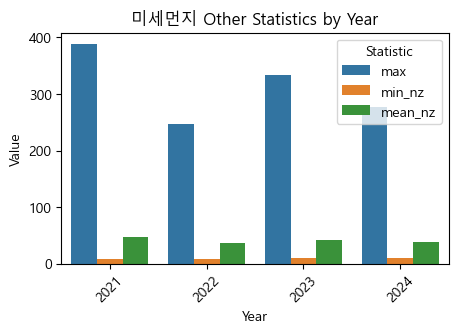

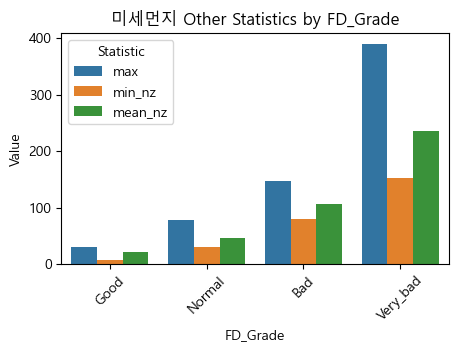

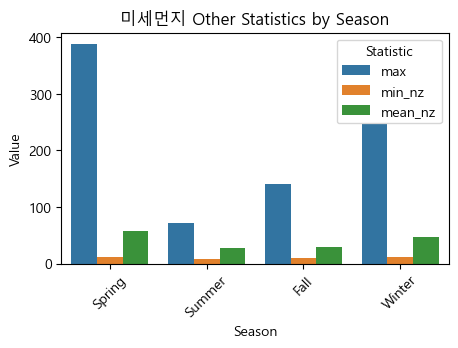

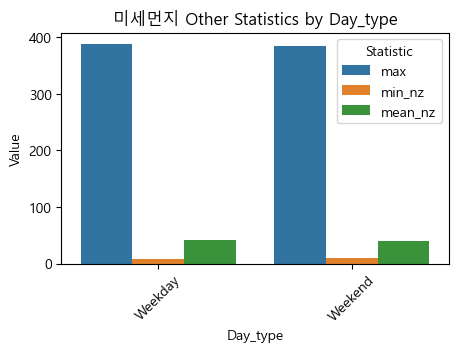

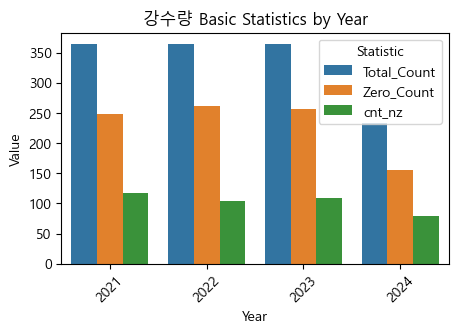

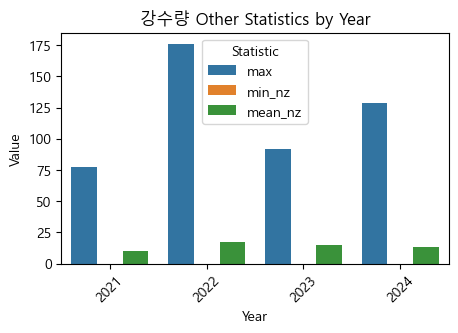

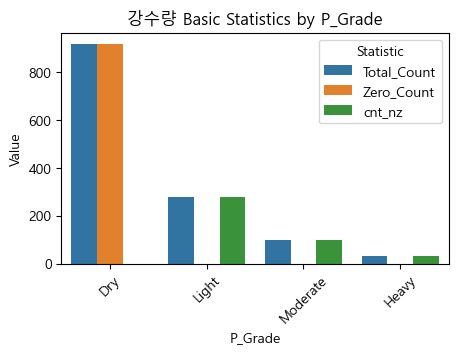

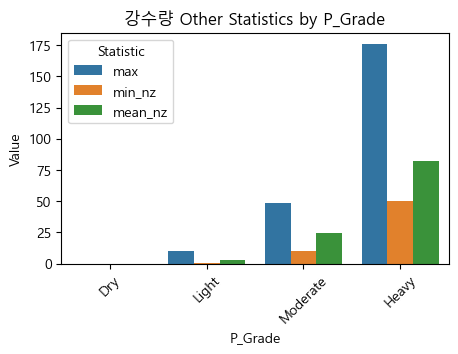

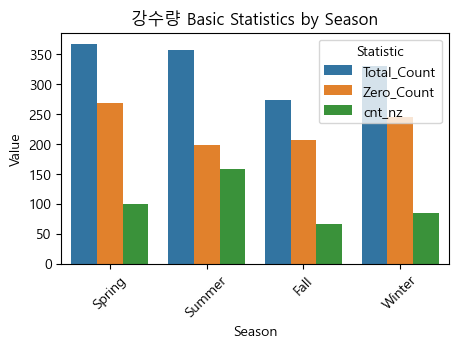

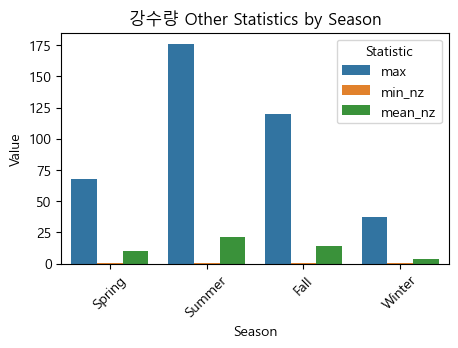

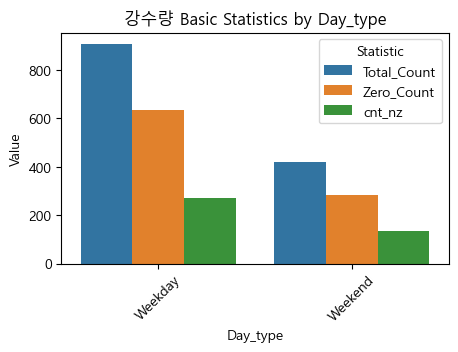

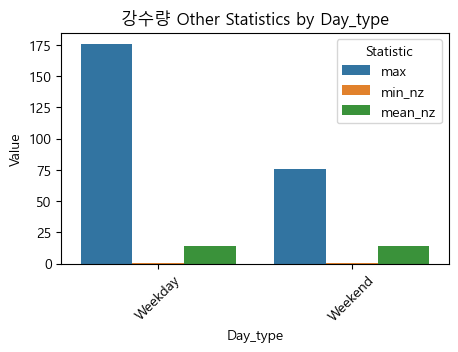

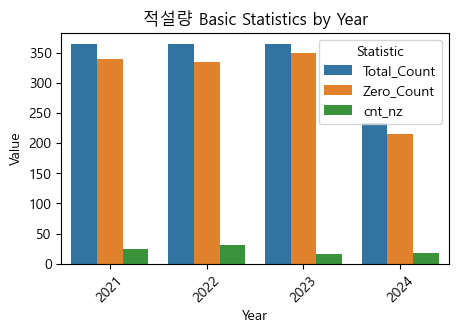

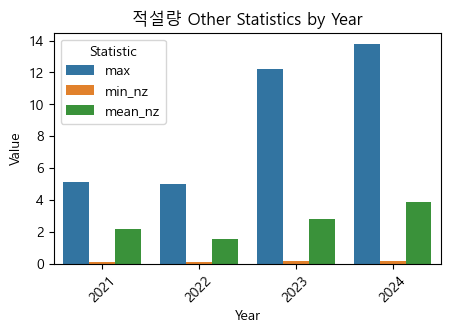

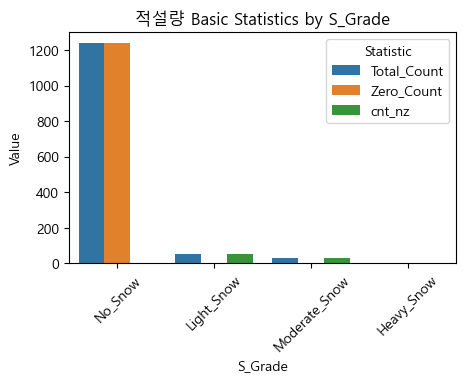

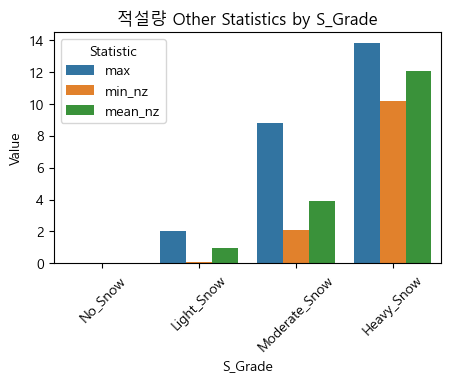

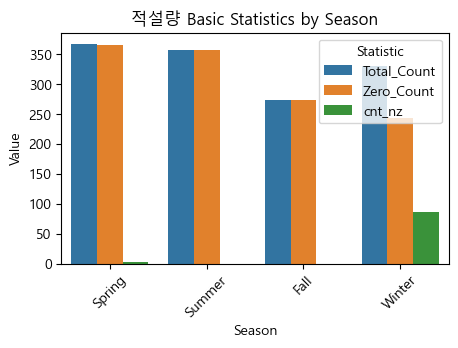

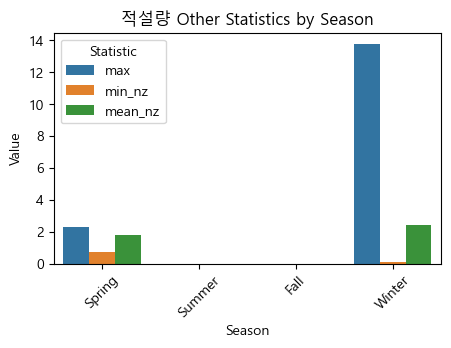

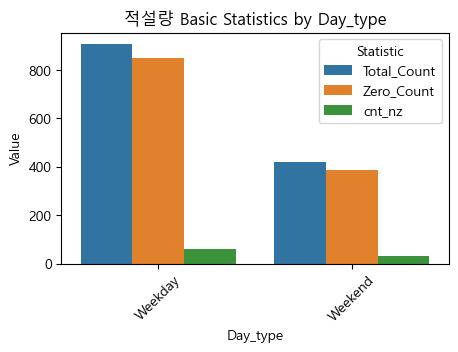

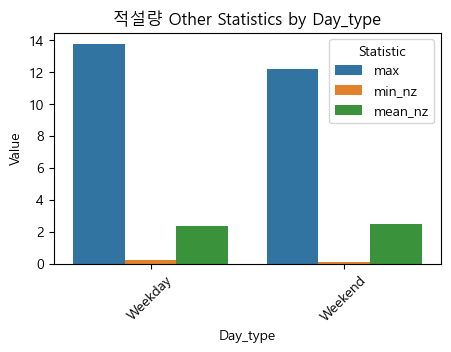

In [92]:
# 미세먼지 통계 시각화
plot_combined_stats(combined_stats1FD, "미세먼지")

# 강수량 통계 시각화
plot_combined_stats(combined_stats1P, "강수량")

# 적설량 통계 시각화
plot_combined_stats(combined_stats1S, "적설량")
